In [193]:
from statsmodels.tsa.arima_model import ARMA
from random import random
import pandas as pd
# contrived dataset
data = pd.read_csv("aapl.txt")




In [194]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [195]:

data['Date'] = pd.to_datetime(data['Date'])







In [196]:
# Get month of each sample
data['month'] = data['Date'].dt.month

In [197]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,9
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,9
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,9
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,9
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,9


In [198]:
# Sort by datetime
data.sort_values(by='Date', inplace=True, ascending=True)
data = data.loc[data['Date'] >= '2013-01-01']
data.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt,month
7138,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1
7139,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1
7140,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1
7141,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1
7142,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1
7143,2013-01-09,67.533,67.830,66.664,66.808,112611881,0,1
7144,2013-01-10,68.287,68.310,66.607,67.636,166038770,0,1
7145,2013-01-11,67.331,67.872,67.057,67.222,96900287,0,1
7146,2013-01-14,64.945,65.568,64.407,64.827,202815867,0,1
7147,2013-01-15,64.382,64.470,62.452,62.781,242045402,0,1


In [199]:
data.index = data['Date']

In [200]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,month
Date,,,,,,,,
2013-01-02,2013-01-02,71.553,71.705,69.978,70.935,154865509,0,1
2013-01-03,2013-01-03,70.745,71.017,69.896,70.039,97488400,0,1
2013-01-04,2013-01-04,69.375,69.591,67.936,68.088,164191192,0,1
2013-01-07,2013-01-07,67.446,68.386,66.566,67.689,133721724,0,1
2013-01-08,2013-01-08,68.375,68.721,67.346,67.871,126651168,0,1


In [201]:
data = data[['Close']]

In [202]:
data.head()

,Close
Date,
2013-01-02,70.935
2013-01-03,70.039
2013-01-04,68.088
2013-01-07,67.689
2013-01-08,67.871


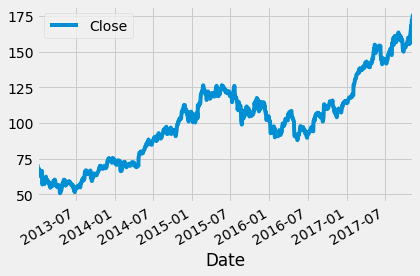

In [203]:
data.plot()
plt.show()

In [204]:
sma50 = data.rolling(window=50).mean()
sma50

,Close
Date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN
2013-01-09,NaN
2013-01-10,NaN
2013-01-11,NaN
2013-01-14,NaN


In [205]:
sma50.iloc[45:52]

,Close
Date,
2013-03-08,NaN
2013-03-11,NaN
2013-03-12,NaN
2013-03-13,NaN
2013-03-14,60.71186
2013-03-15,60.44630
2013-03-18,60.22994


In [206]:
plt.style.use('fivethirtyeight')

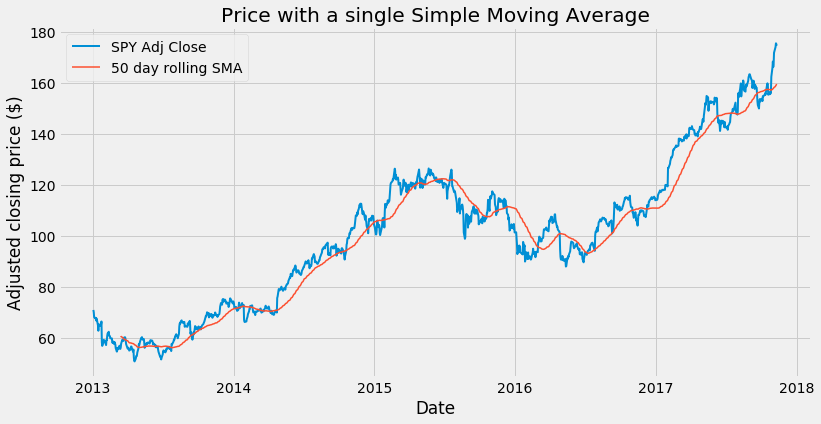

In [207]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(data, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

In [208]:
data.head()


,Close
Date,
2013-01-02,70.935
2013-01-03,70.039
2013-01-04,68.088
2013-01-07,67.689
2013-01-08,67.871


In [211]:
train = data['2013-1-1':'2016-12-31']
test = data['2016-12-31':]
#train.index = train['Date']
#test.index = test['Date']


In [212]:
train.head()

,Close
Date,
2013-01-02,70.935
2013-01-03,70.039
2013-01-04,68.088
2013-01-07,67.689
2013-01-08,67.871


In [213]:
test.head()

,Close
Date,
2017-01-03,114.31
2017-01-04,114.19
2017-01-05,114.77
2017-01-06,116.04
2017-01-09,117.11


In [214]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(test.shape)


 Shape of training set:
(1008, 1)

 Shape of validation set:
(218, 1)


In [215]:
# create predictions using the test set
preds = []
for i in range(0,test.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


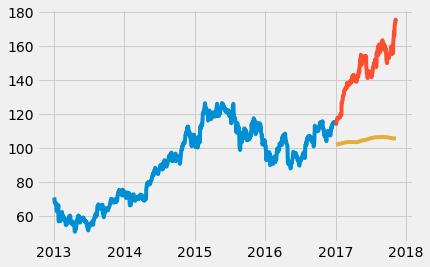

In [217]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

In [220]:
# checking the results (RMSE value)
import numpy as np
rms=np.sqrt(np.mean(np.power((np.array(test['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
43.080016538417745


In [218]:
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

1226    139.414221
dtype: float64


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
